# TFSD

## Exercice I

Calculez la TFSD des signaux suivants :

   + $x[n\,T_e]=\delta[n\,T_e]$

   + $x[n\,T_e]=\delta_3[n\,T_e]=\delta[(n-3)\,T_e]$

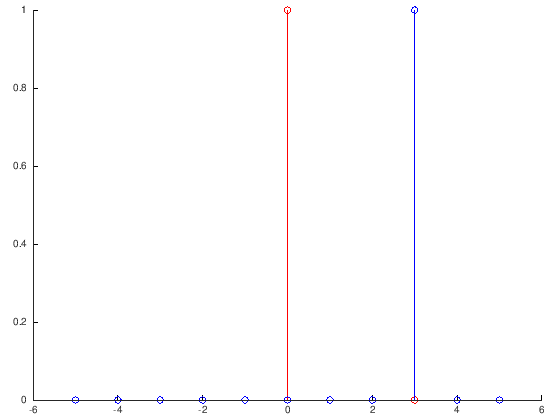

In [1]:
clear all;
close all;
delta = @(n) n==0 ;

x = delta;
n=-5:5;
stem(n,x(n),'r'); hold on;
stem(n,x(n-3),'b')


## Exercice II
On rappelle l'équation de la transformée de Fourier des signaux discrets (TFSD) :

$X(f)=\sum\limits_{n=-\infty}^{+\infty}x[n]\,e^{-i\,2\pi\,n\frac{f}{F_e}}$

où $F_e$ est la fréquence d'échantillonnage.


Soit d'autre part le signal : $e[n] = \delta[n-1] + 2.\delta[n]+ \delta[n+1]$.

   - 1 Représenter e[n].

   - 2 Calculer E(f), TFSD de e[n]. Tracer $|E(f)|$ dans l'intervalle ± Fe.

On rappelle l'équation de la transformée de Fourier discrète (TFD) à N points :

$X[k.\Delta f ] = \sum\limits_n x[n].e^{i 2 \pi\,\frac{n}{N}k}$

avec k entier, $\Delta_f = \frac{Fe}{N}$.

   - 3°) Calculer $E[k\Delta_f]$, TFD à 3 points de e[n]. Tracer $E[k\Delta_f]$ dans l'intervalle ± Fe.

   - 4°) Calculer $E[k\Delta_f]$, TFD à 5 points de e[n]. Tracer $E[k\Delta_f]$ dans l'intervalle ± Fe.

   - 5°) On fait maintenant passer le signal $e[nT_e]$, avec Te = 1/Fe, par un élévateur de fréquence
d'échantillonnage (EFE), de rapport d'élévation R = 2. Soit y[nTe'] le signal de sortie de
l'EFE. Tracer y[n]. Calculer Y(f), TFSD de y[nTe'], en fonction de f et de Fe .

   - 6°) En quelques phrases claires et brèves, conclure sur l'ensemble de ce travail.

   N.B : sur chacun des tracés des questions 3 et 4, on superposera la courbe de la question 2.


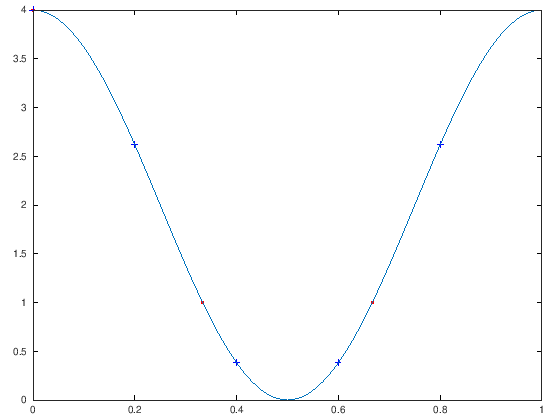

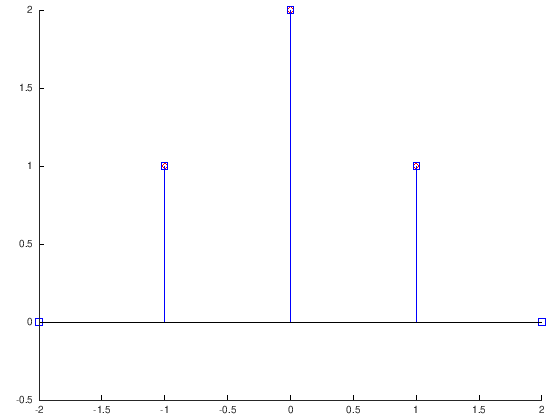

In [2]:
e = @(n) delta(n-1) + 2*delta(n) + delta(n+1) ;

figure(2)
TE= @(f) 2+2*cos(2*pi*f);
k3=0:2;
k5=0:4;
plot(k3 /3,TE(k3/3),'r.'); hold on;
plot(k5 /5,TE(k5/5),'b+'); hold on;
f=0:0.01:1;
plot(f,TE(f));

figure(3);
stem(k3-1,fftshift(ifft(TE(k3/3))),'rd');
hold on;
stem(k5-2,fftshift(ifft(TE(k5/5))),'bs');



n =

  -2  -1   0   1   2

y =

   1   0   2   0   1



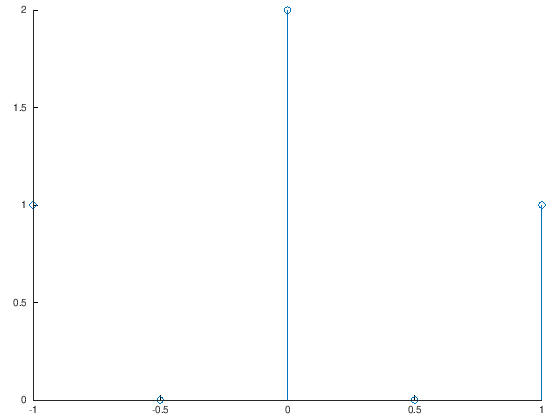

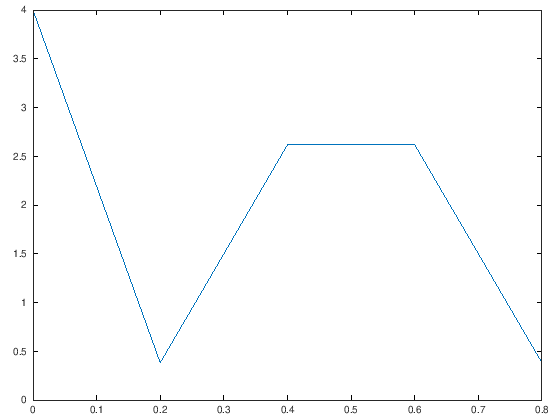

In [3]:
n=-2:2
y=e(n/2)
stem(n/2,y)

figure
plot((n+2)/5,abs(fft(y)))

## Exercice III
Un signal analogique x, purement sinusoïdal de fréquence F = 60 Hz, est échantillonné
au rythme de 500 échantillons par seconde. Après conversion analogique-numérique, il est
analysé avec une FFT à 64 points.
On rappelle l’expression de la transformée de Fourier discrète à N points :

$X[k.\Delta f ] = \sum\limits_n x[n].e^{i 2 \pi\,\frac{n}{N}k}$

avec k entier, $\Delta_f = \frac{Fe}{N}$.

   - 1°) Quelle est la valeur de la fréquence Fe d’échantillonnage ?

   - 2°) Quelle est la valeur de la période Te d’échantillonnage ?

   - 3°) Quelle est la valeur de la période T du signal analogique ?

   - 4°) Quels sont les rangs (<=> valeurs de k) correspondant aux valeurs les plus élevées du
module de la FFT du signal analogique, pour un tracé de spectre où 0 ≤ k ≤ 64 ?

   - 5°) Quelle nouvelle fréquence Fe ’ d’échantillonnage éliminerait les problèmes associés au
fenêtrage (troncature temporelle) ? On proposera la valeur la plus proche de celle trouvée au